In [49]:
## Installation Steps (You could also read the word file included with the datafiles)
# First Time Setup:
# 1.	Extract the Zip files into a folder on local machine
# •	The zip files open into the following structure
# i.	<train> folder which has the data files and notebook
# 1.	validationIdx1-transformed.csv
# 2.	validationIdx1-FavoriteItem-aggregated.csv
# 3.	validationIdx1-ToprankingItems-Aggregated.csv
# 4.	validationIdx1-UserInvolvement-Aggregated.csv
# 5.	validationIdx1-UserPreferedsession-Aggregated.csv
# 6.	validationIdx1-UserRankBias1-Aggregated.csv
# 7.	validationIdx1-UserRankBias2-Aggregated.csv
# 8.	Python notebook

# 2.	Open a new AWS EC2 Instance (do not open an existing one)
# Follow the steps below
# •	Select Amazon Linux Instance
# •	Choose m4.2xlarge (8vCPU, 32 GB memory) Instance Type
# •	Add 30 GiB Storage (SSD)
# •	Configure Security Group for ports: 8000, 8888 and http, https
# •	Launch Instance

# 3.	Run Putty for EC2 Instance
# Follow the steps below
# •	Enter Public IP and SSH keypair in Putty Configuration window
# •	Click Open

# 4.	EC2 Command Prompt
# Follow the steps below
# •	Login as ec2-user
# •	Follow the following steps to setup tmpnb Server on AWS
# o	Type the following command without quotes to install docker, and if prompted, allow the installation:
# sudo yum install docker

# o	Type the following command to start the docker daemon:
# sudo service docker start

# o	Type the following command in the AWS EC2 instance terminal to save a unique random token to your linux environment. This will be used for authentication by your docker containers.
# export TOKEN=$( head -c 30 /dev/urandom | xxd -p )

# o	Type the following command in the AWS EC2 instance terminal to start the proxy server. This proxy server will be used to route the request from the web to your tmpnb orchestrator running locally.

# sudo docker run --net=host -d -e CONFIGPROXY_AUTH_TOKEN=$TOKEN --name=proxy jupyter/configurable-http-proxy --default-target http://127.0.0.1:9999

# o	Type the following command to download the docker image containing the custom ipython notebook that you want to run on the tmpnb docker instance
# sudo docker pull waituck/custom_nb

# This will take some time to download and extract images.

# 5.	WinSCP the data files into EC2 Instance
# Follow the steps below
# •	Download and Install WinSCP 5.7.5 for windows from the following URL 
# https://winscp.net/eng/download.php
# •	Open installed WinSCP
# •	In the window follow the following steps
# o	Choose SCP in File Protocol
# o	Copy AWS EC2 instance Public IP in Host name. Keep port at 22
# o	Do not enter User Name and Password
# o	Click Advanced button
# o	Choose SSH>authentication in left panel
# o	In the field Private key file…Select the keypair used for logging into putty
# o	Click OK
# o	Click Login
# o	You will get a popup “Continue connecting to a unknown server and add its host key to a cache?”. Click Yes to that window
# o	You will be asked for user name. Enter ec2-user
# o	You will see a window with an LHS and and an RHS window. LHS is local drive and RHS is your ec2 instance drive
# o	In RHS, create a new folder “train” in the default home/ ec2-user/
# 	To create folder righ click and choose New > Directory
# 	Name the folder “train”
# o	From LHS, drag the data files extracted in step 1 above and drop it in RHS within “trial” folder
# o	The upload process will begin. Please wait as this will take few minutes.
# o	Keep the WinSCP window running

# 6.	Mounting the data files into docker image and launching tmpnb server
# Follow the steps below
# •	Type the following command to SSH into the notebook docker image from your EC2 instance:
# sudo docker run -v /home/ec2-user/train:/mnt -it waituck/custom_nb /bin/bash

# •	You will be in the terminal of the image. Type the following command to copy the files into the image:
# cp -r /mnt/* . 

# Copy the entire command including the dot that comes after asterix and space. Please do not remove space between “*” and “.”

# •	You may check if the files are in with the following command:
# ls –a

# Please do not remove space between “ls” and “-a”
# You should see your files.

# •	Next, very important, press Ctrl + P, then Ctrl + Q, without releasing Ctrl. You will be back in the ec2-user terminal. 

# •	Type the following:

# sudo docker ps

# •	You should see something like this
 
 
# With reference to the name, in this case cocky_cori (replace it with what you see in the ec2 command screen of yours), type the following command (This will take some time! Be patient!)

# sudo docker commit cocky_cori mydocker

# Remember: Replace “cocky_cori” in above script with what you see in the ec2 command screen of yours before executing

# This may take sometime

# This will save your docker image. 

# •	Now when you launch the tmpnb server start command from this:

# sudo docker run --net=host --name=tmpnb -d -e CONFIGPROXY_AUTH_TOKEN=$TOKEN \
#           -v /var/run/docker.sock:/docker.sock \
#           jupyter/tmpnb python orchestrate.py --image='mydocker' --pool_size=10 --command="ipython notebook --NotebookApp.base_url={base_path} --ip=0.0.0.0 --port {port}”
#
# 7.	Access the final tmpnb server with the following url:
# http://<Public IP>:8000
# Replace <Public IP> with your public IP that can be found below


# Rerun once you shut down your amazon instance
# 1	Run Putty for EC2 Instance
# Follow the steps below
# •	Enter Public IP and SSH key pair in Putty Configuration window
# •	Click Open

# 2.	EC2 Command Prompt
# Follow the steps below
# •	Login as ec2-user
# •	Follow the following steps to setup tmpnb Server on AWS
# o	Restart Docker
# sudo service docker restart

# o	Remove the previously started docker instances
# sudo docker rm proxy
# sudo docker rm tmpnb

# o	Set the Environment Variable
# export TOKEN=$( head -c 30 /dev/urandom | xxd -p )

# o	Start the Docker Instances
# sudo docker run --net=host -d -e CONFIGPROXY_AUTH_TOKEN=$TOKEN --name=proxy jupyter/configurable-http-proxy --default-target http://127.0.0.1:9999

# sudo docker run --net=host --name=tmpnb -d -e CONFIGPROXY_AUTH_TOKEN=$TOKEN \
#           -v /var/run/docker.sock:/docker.sock \
#           jupyter/tmpnb python orchestrate.py --image='mydocker' --pool_size=10 --command="ipython notebook --NotebookApp.base_url={base_path} --ip=0.0.0.0 --port {port}”

# 3.	Access the final tmpnb server with the following url:
# http://<Public IP>:8000
# Replace <Public IP> with your public IP that can be found below



In [50]:
## Start running the codes from the below lines
#!pip install pandas
#!pip install matplotlib

In [4]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

# Print the version of Python notebook
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 2.7.10 |Continuum Analytics, Inc.| (default, May 28 2015, 17:02:03) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version 0.16.2


In [52]:
#Import the  raw CSV file into the Notebook
import csv
with open('validationIdx1-transformed.csv') as csvfile:
    reader = csv.DictReader(csvfile)

#Creating a dataframe and reading the location of the file   
Location = r'validationIdx1-transformed.csv'
df = pd.read_csv(Location)
#read the Dataframe
df

,Track ID,Rank,Session ID,Session Time,User ID
0,624960,100,6459,10:16:00 AM,487058
1,624958,30,4914,12:16:00 AM,72023
2,624958,0,5279,9:59:00 PM,132921
3,624958,30,5306,11:21:00 PM,794831
4,624958,90,5561,6:43:00 PM,960903
5,624957,0,5293,9:52:00 AM,389064
6,624957,0,5461,7:51:00 AM,883177
7,624955,50,4765,9:16:00 AM,147365
8,624952,30,4557,6:20:00 PM,189876
9,624952,90,5902,2:49:00 PM,513096


In [53]:
#Data type of the coloumns present in the file
print ("Attribute Data types")
df.dtypes

Attribute Data types


Track ID         int64
Rank             int64
Session ID       int64
Session Time    object
User ID          int64
dtype: object

In [54]:
# read the number of rows present in the file
file = open("validationIdx1-transformed.csv")
numline = len(file.readlines())
print "Number of rows:", numline

#number of unique User ID's 
uniqueuserid=df['User ID'].nunique()
print "Number of Raters:", uniqueuserid

#Number of Unique Ranks
uniquerank=df['Rank'].nunique()
print "Ranking Scale:", uniquerank

#Number of Unique Track id's
uniquetrack=df['Track ID'].nunique()
print "Number of Items that are ranked:", uniquetrack

Number of rows: 4003961
Number of Raters: 1000990
Ranking Scale: 101
Number of Items that are ranked: 258694


Descriptive Statistics of Continuous Attributes
The Track Id Box-Plot


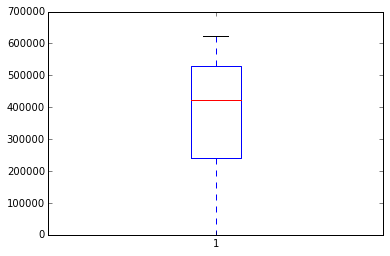

The User Id Box-Plot


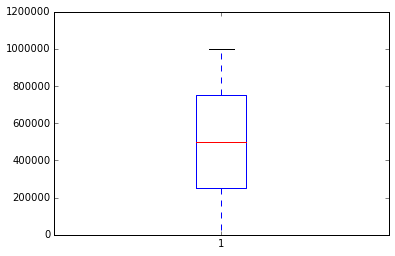

The Ranking Box-Plot


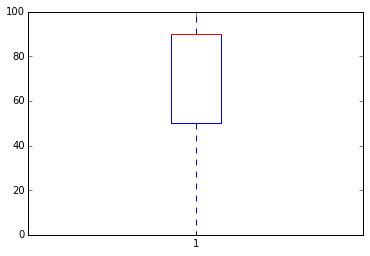

The Session ID Box-Plot


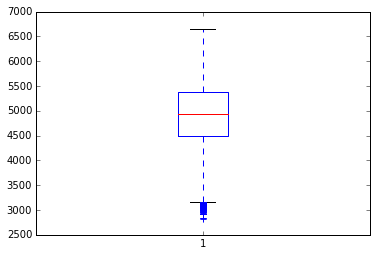

In [20]:
#plotting the box plot
#Import  Pandas
import pandas as pd
# read in the Transformed data csv
user_idd = pd.read_csv("validationIdx1-transformed.csv")

#Create boxplot for Track ID
print ("Descriptive Statistics of Continuous Attributes")
print ("The Track Id Box-Plot")
Track_id_box = user_idd['Track ID']
plt.boxplot(Track_id_box)
plt.show()

#Create boxplot for User ID
print ("The User Id Box-Plot")
user_id_box = user_idd['User ID']
plt.boxplot(user_id_box)
plt.show()

#Create boxplot for Rank
print ("The Ranking Box-Plot")
rank_box = user_idd['Rank']
plt.boxplot(rank_box)
plt.show()

#Create boxplot for Session ID
print ("The Session ID Box-Plot")
session_box = user_idd['Session ID']
plt.boxplot(session_box)
plt.show()

In [56]:
#Number of Unique User ID's based on Ranking
print ("Ranks and number of raters")
df.groupby("Rank").agg({ "User ID": lambda x: x.nunique()})

Ranks and number of raters


,User ID
Rank,
0,254841
1,475
2,244
3,162
4,206
5,179
6,196
7,88
8,234


Histogram of Rank Density


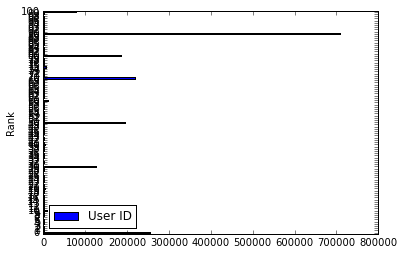

In [57]:
#histogram
# grouping the user ids by Rank
barhn=df.groupby("Rank").agg({ "User ID": lambda x: x.nunique()})

#plotting the graph
print ("Histogram of Rank Density")
plt.figure()
barhn.plot(kind='barh', stacked=True);

In [21]:
#opening the tableau sheet 
from IPython.display import IFrame
from IPython.core.display import display

display(IFrame('https://public.tableau.com/views/MusicDataV-sualization/YahooMusicuserratingsofmusicaltracksalbumsartistsandgenres?:embed=y&:display_count=yes&:showTabs=y', '100%', '2000px'))